In [3]:
!unzip silicon_wafer_img.zip

Archive:  silicon_wafer_img.zip
  inflating: WM811k_Dataset/Center/641447.jpg  
  inflating: WM811k_Dataset/Center/642989.jpg  
  inflating: WM811k_Dataset/Center/646177.jpg  
  inflating: WM811k_Dataset/Center/648236.jpg  
  inflating: WM811k_Dataset/Center/651816.jpg  
  inflating: WM811k_Dataset/Center/655870.jpg  
  inflating: WM811k_Dataset/Center/659673.jpg  
  inflating: WM811k_Dataset/Center/678673.jpg  
  inflating: WM811k_Dataset/Center/679609.jpg  
  inflating: WM811k_Dataset/Center/680688.jpg  
  inflating: WM811k_Dataset/Center/682743.jpg  
  inflating: WM811k_Dataset/Center/683806.jpg  
  inflating: WM811k_Dataset/Center/686597.jpg  
  inflating: WM811k_Dataset/Center/687416.jpg  
  inflating: WM811k_Dataset/Center/691371.jpg  
  inflating: WM811k_Dataset/Center/692645.jpg  
  inflating: WM811k_Dataset/Center/696055.jpg  
  inflating: WM811k_Dataset/Center/712477.jpg  
  inflating: WM811k_Dataset/Center/713551.jpg  
  inflating: WM811k_Dataset/Center/720828.jpg  
  inflat

In [4]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder

data_dir = "WM811k_Dataset"

# 이미지 크기 지정 (CNN 입력 크기에 맞게 설정)
img_height, img_width = 32, 32

X = []
y_orig = []

# 폴더별 이미지 불러오기
for label_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, label_name)
    if not os.path.isdir(folder_path):
        continue

    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            fpath = os.path.join(folder_path, fname)

            # 이미지 로드 및 배열 변환
            img = load_img(fpath, target_size=(img_height, img_width))
            img_array = img_to_array(img)
            X.append(img_array)
            y_orig.append(label_name)

# numpy 배열로 변환
X = np.array(X, dtype="float32") / 255.0  # 정규화
y_orig = np.array(y_orig)

# 문자열 레이블 → 숫자 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_orig)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("클래스 목록:", label_encoder.classes_)


X shape: (902, 32, 32, 3)
y shape: (902,)
클래스 목록: ['Center' 'Donut' 'Edge Local' 'Edge Ring' 'Local' 'Scratch' 'near full'
 'none' 'random']


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.1)

In [6]:
#CNN
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 9
input_shape = (img_height, img_width ,3) #이미지 한장의 크기, 1: 흑백이미지

In [7]:
#One hot encoding Y
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train.shape

(811, 9)

In [8]:
#은닉층 구성
model = keras.Sequential()
model.add( layers.Conv2D(32,kernel_size=(3,3),activation='relu', input_shape = (img_height, img_width , 3)) )
model.add(  layers.MaxPooling2D(pool_size=(2,2)))
model.add(  layers.Conv2D(64,kernel_size=(3,3),activation='relu') )
model.add( layers.MaxPooling2D(pool_size=(2,2)) )

model.add(  layers.Flatten() )  #3차원 이미지->한줄짜리로...
model.add( layers.Dropout(0.5) )  #drop out 50% 지정
model.add( layers.Dense(num_classes,activation='softmax') )


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#Compile + Fit
batch_size = 128
epoch =10
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model.fit(X_train,y_train,batch_size=batch_size, epochs=epoch, validation_split=0.1)
#한 epoch, X_train의 10%를 random하게 선택해서 validation에 사용

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 875ms/step - accuracy: 0.1693 - loss: 2.1721 - val_accuracy: 0.2805 - val_loss: 2.0338
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2861 - loss: 1.9790 - val_accuracy: 0.2927 - val_loss: 1.7837
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3693 - loss: 1.7380 - val_accuracy: 0.4878 - val_loss: 1.5417
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4544 - loss: 1.5061 - val_accuracy: 0.4756 - val_loss: 1.4073
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4974 - loss: 1.3684 - val_accuracy: 0.5976 - val_loss: 1.2893
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5415 - loss: 1.2866 - val_accuracy: 0.5610 - val_loss: 1.2420
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5495 - loss: 1.2224 - val_accuracy: 0.6341 - val_loss: 1.1744
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5944 - loss: 1.1588 - val_accuracy: 0.5854 - val_loss: 1.128

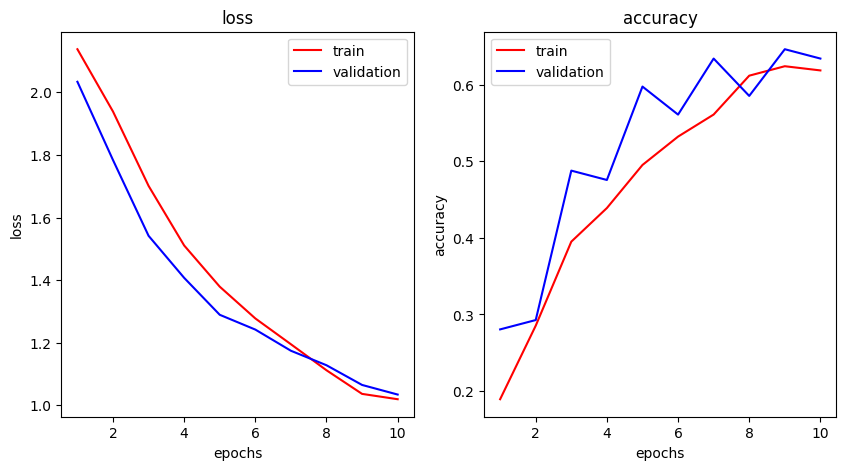

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 0.6641 - loss: 0.9289
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step

               precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.90      0.90      0.90        10
           2       0.78      0.70      0.74        10
           3       0.83      0.71      0.77         7
           4       0.20      0.29      0.24         7
           5       0.14      0.11      0.12         9
           6       0.92      1.00      0.96        11
           7       0.71      0.86      0.77        14
           8       0.78      0.78      0.78         9

    accuracy                           0.70        91
   macro avg       0.68      0.67      0.67        91
weighted avg       0.71      0.70      0.70        91



In [10]:
#학습결과 확인
import matplotlib.pyplot as plt
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']
acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']
epochs = np.arange(epoch)+1

#plot
fig = plt.figure(figsize= (10,5) )

# loss
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'red', label = 'train')
ax1.plot(epochs, val_loss, color = 'blue', label = 'validation')
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

#accuracy
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'red', label = 'train')
ax2.plot(epochs, val_acc, color = 'blue', label = 'validation')
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

# 모형 평가-train, test
model.evaluate(X_test, y_test)

#분류 보고서
from sklearn.metrics import classification_report, confusion_matrix
results = model.predict(X_test)
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))



In [11]:
!pip install -q keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 13.6 MB/s eta 0:00:00


In [12]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=input_shape))

    # 하이퍼파라미터
    filters = hp.Choice("filters", [16, 32, 64])
    kernel  = hp.Choice("kernel", [3, 5])
    dense   = hp.Choice("dense", [64, 128, 256])
    drop    = hp.Float("dropout", 0.1, 0.5, step=0.1)
    lr      = hp.Float("lr", 1e-4, 1e-2, sampling="log")

    # CNN
    model.add(layers.Conv2D(filters, kernel, activation="relu", padding="same"))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(filters*2, kernel, activation="relu", padding="same"))
    model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dropout(drop))
    model.add(layers.Dense(dense, activation="relu"))
    model.add(layers.Dense(num_classes, activation="softmax"))

    model.compile(optimizer=keras.optimizers.Adam(lr),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=10,            # 작게
    overwrite=True,
    directory="kt_wafer",
    project_name="simple"
)

stop = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)

tuner.search(X_train, y_train, epochs=20, validation_split=0.1, callbacks=[stop])

best_hp = tuner.get_best_hyperparameters(1)[0]
print("Best HP:", best_hp.values)

best_model = tuner.get_best_models(1)[0]



Trial 10 Complete [00h 00m 09s]
val_accuracy: 0.792682945728302

Best val_accuracy So Far: 0.8170731663703918
Total elapsed time: 00h 01m 43s
Best HP: {'filters': 64, 'kernel': 3, 'dense': 128, 'dropout': 0.4, 'lr': 0.00011420289343998813}


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
